<a href="https://colab.research.google.com/github/fschnefeld/fschnefeld/blob/main/MMM_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Marketing Mix Modelling - Based on Google's Lightweight MMM

Installing the rep directly from Google's source

In [ ]:
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

  Cloning https://github.com/google/lightweight_mmm.git to /tmp/pip-req-build-cxy3hjyv
  Running command git clone --filter=blob:none --quiet https://github.com/google/lightweight_mmm.git /tmp/pip-req-build-cxy3hjyv
  Resolved https://github.com/google/lightweight_mmm.git to commit b4c99fa7532b767b7c3b519e41f8dffa15ab8c65
  Preparing metadata (setup.py) ... done


In [ ]:
# Importing necessary libraries
import jax.numpy as jnp
import numpyro
numpyro.set_host_device_count(2)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import preprocessing
from lightweight_mmm import utils

# Load your data (replace with the actual path to your CSV file)
data_path = '/content/dummyData - Sheet5.csv'
data = pd.read_csv(data_path)

data['leads'] = data['leads'].astype(int).copy()
data['week'] = pd.to_datetime(data['week'])
#data['weekday'] = data['weekday'].astype(str).copy()
data.dtypes

week         datetime64[ns]
leads                 int64
cost_af             float64
cost_bing           float64
cost_fb             float64
cost_ga             float64
dtype: object

In [ ]:
weekday_coded = pd.get_dummies(data['weekday'], prefix='weekday')
concat_data = pd.concat([data, weekday_coded], axis=1).copy()
concat_data.dtypes

date           datetime64[ns]
weekday                object
leads                   int64
cost_fb               float64
cost_ga               float64
cost_bing             float64
adform_cost           float64
weekday_1               uint8
weekday_2               uint8
weekday_3               uint8
weekday_4               uint8
weekday_5               uint8
weekday_6               uint8
weekday_7               uint8
dtype: object

<ipython-input-21-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


              leads   cost_af  cost_bing   cost_fb   cost_ga
leads      1.000000  0.260008   0.050292  0.419370 -0.127652
cost_af    0.260008  1.000000   0.366325  0.728857  0.408610
cost_bing  0.050292  0.366325   1.000000  0.521439  0.574970
cost_fb    0.419370  0.728857   0.521439  1.000000  0.483091
cost_ga   -0.127652  0.408610   0.574970  0.483091  1.000000


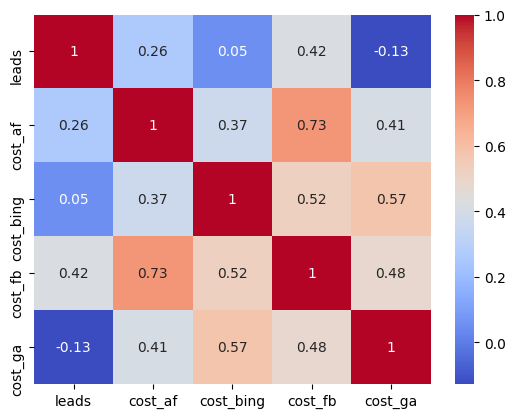

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

In [ ]:
# Define the target feature
#target_feat = data['leads'].to_numpy()
#mdsp_cols = ["cost_fb","cost_ga","cost_bing","adform_cost"]
#weekday_cols = ["weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6", "weekday_7"]
#weekday_cols = data[f"weekday_{i}" for i in range(1, 8)]
#weekday_cols_numpy = data[weekday_cols].to_numpy()
#media_data = data[mdsp_cols].to_numpy()
#n_media_channels = len(mdsp_cols)
#costs = data[mdsp_cols].sum().to_numpy()
SEED = 40
data_size = len(data)
# Define the target feature
target_feat = data['leads'].to_numpy()
mdsp_cols = ["cost_fb","cost_ga","cost_bing","cost_af"]
#weekday_cols = ["weekday_1", "weekday_2", "weekday_3", "weekday_4", "weekday_5", "weekday_6", "weekday_7"]
#weekday_cols1 = [concat_data[f"weekday_{i}"] for i in range(1, 8)]
media_data = data[mdsp_cols].to_numpy()
#weekday_data = data[weekday_cols].to_numpy()
n_media_channels = len(mdsp_cols)
costs = data[mdsp_cols].sum().to_numpy()




#Need to split into train and test

test_data_period_size = 35
split_point = data_size - test_data_period_size
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]

target_train = target_feat[:split_point]
# Extract the weekday columns as extra features
#weekday_data = data[weekday_cols].to_numpy()

# Combine media data and weekday data into a single feature matrix
#combined_features = np.hstack((weekday_cols1))

# Need to scale the features and target_kpi

media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

# Create a LightweightMMM object
mmm = lightweight_mmm.LightweightMMM(model_name="hill_adstock")
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    media_names=mdsp_cols,
    #extra_features=weekday_cols,
    seed=SEED
)
mmm.print_summary()
# Preprocess the data (scaling, transformations, etc.)
#mmm.preprocessing()
#target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
# Train the model
#mmm.train()

# Optimize media spend
#optimized_spend = mmm.optimize_media_spend()

# Print the optimized media spend
#print("Optimized Media Spend:")
#print(optimized_spend)

# You can also plot the results
#mmm.plot()


  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]


                                         mean       std    median      5.0%     95.0%     n_eff     r_hat
                      coef_media[0]      0.77      0.55      0.67      0.00      1.54   1071.89      1.00
                      coef_media[1]      1.40      1.16      1.11      0.00      3.01   1014.05      1.00
                      coef_media[2]      0.07      0.05      0.07      0.00      0.15   2000.46      1.00
                      coef_media[3]      0.40      0.29      0.35      0.00      0.81   1399.87      1.00
                      coef_trend[0]     -0.03      0.19     -0.03     -0.30      0.32    502.58      1.01
                         expo_trend      0.81      0.24      0.76      0.50      1.16    963.72      1.00
             gamma_seasonality[0,0]     -0.17      0.97     -0.20     -1.70      1.45    890.69      1.00
             gamma_seasonality[0,1]     -0.88      0.59     -0.83     -1.82      0.09    803.21      1.00
             gamma_seasonality[1,0]      0.41

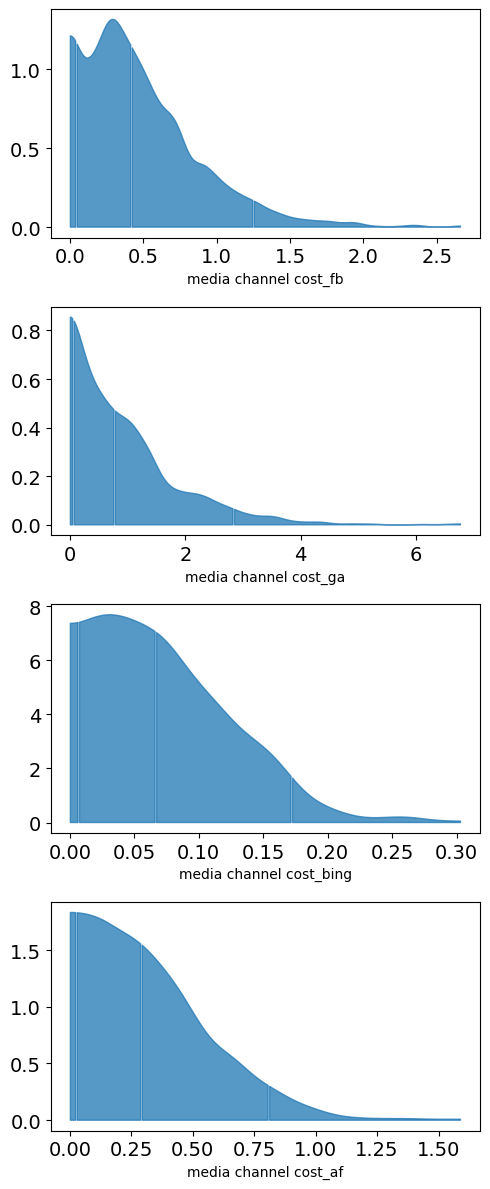

In [ ]:
plot.plot_media_channel_posteriors(media_mix_model=mmm, channel_names=mdsp_cols)

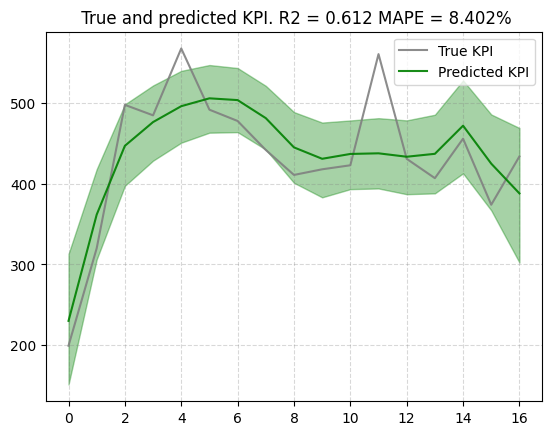

In [ ]:
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [ ]:
#new_predictions = mmm.predict(
#   media=media_data_train
#)

new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              seed=SEED)

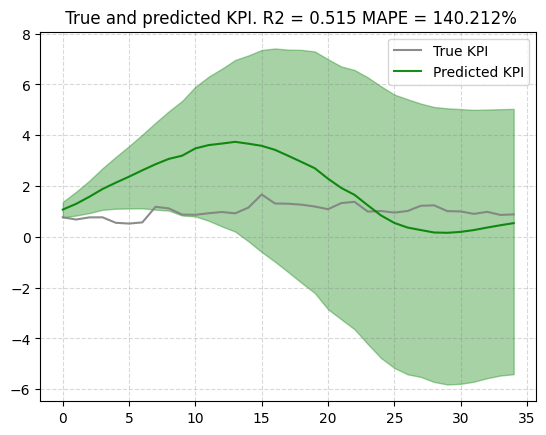

In [ ]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_feat[split_point:]))

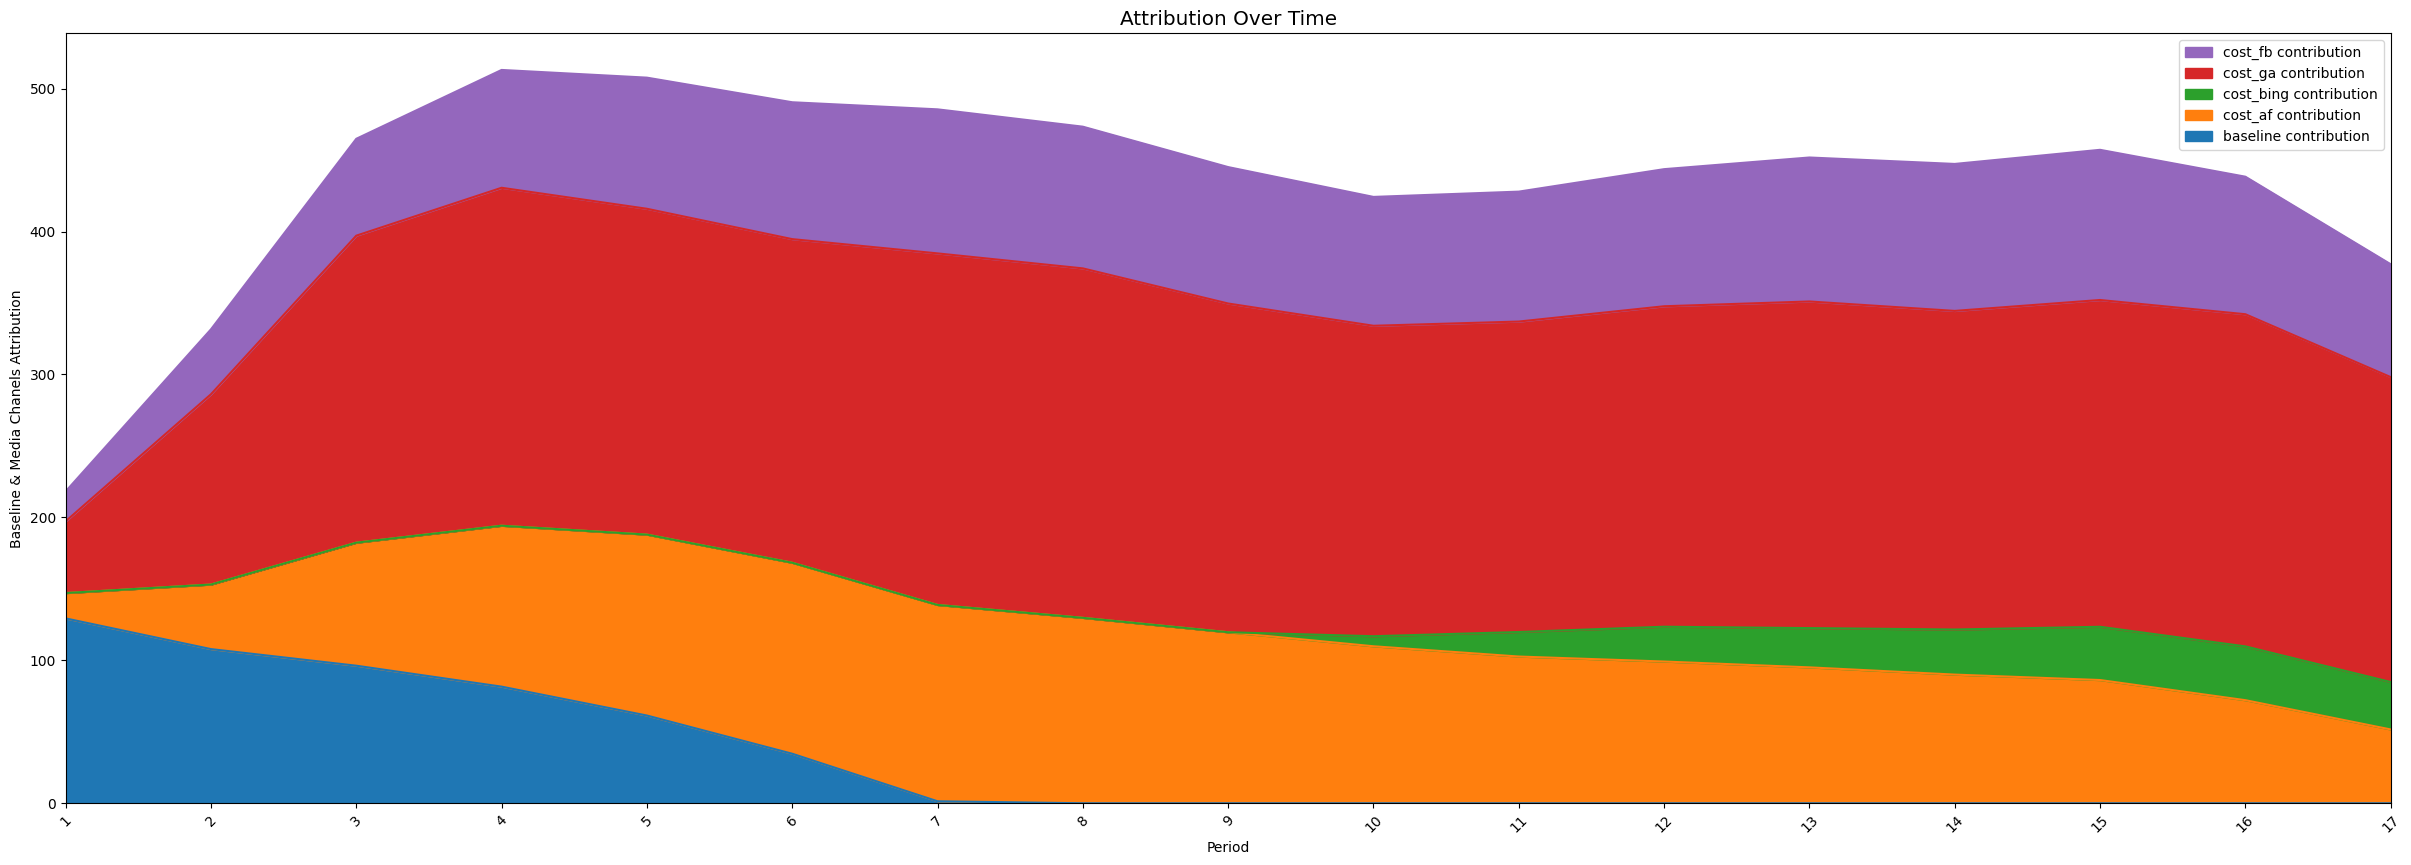

In [ ]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10),
                                                channel_names = mdsp_cols
                                                )

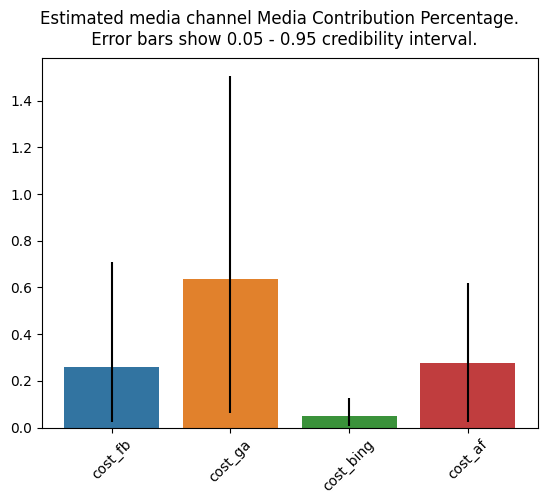

In [ ]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage", channel_names=mdsp_cols)


<ipython-input-49-2f4ea3e4632c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


              leads   cost_af  cost_bing   cost_fb   cost_ga
leads      1.000000  0.260008   0.050292  0.419370 -0.127652
cost_af    0.260008  1.000000   0.366325  0.728857  0.408610
cost_bing  0.050292  0.366325   1.000000  0.521439  0.574970
cost_fb    0.419370  0.728857   0.521439  1.000000  0.483091
cost_ga   -0.127652  0.408610   0.574970  0.483091  1.000000


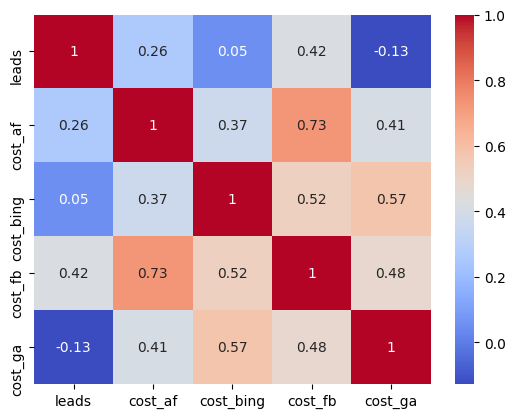

<Figure size 2500x480 with 0 Axes>

<Figure size 640x2000 with 0 Axes>

In [ ]:
correlation_matrix = data.corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.figure().set_figwidth(25)
plt.figure().set_figheight(20)
plt.show()

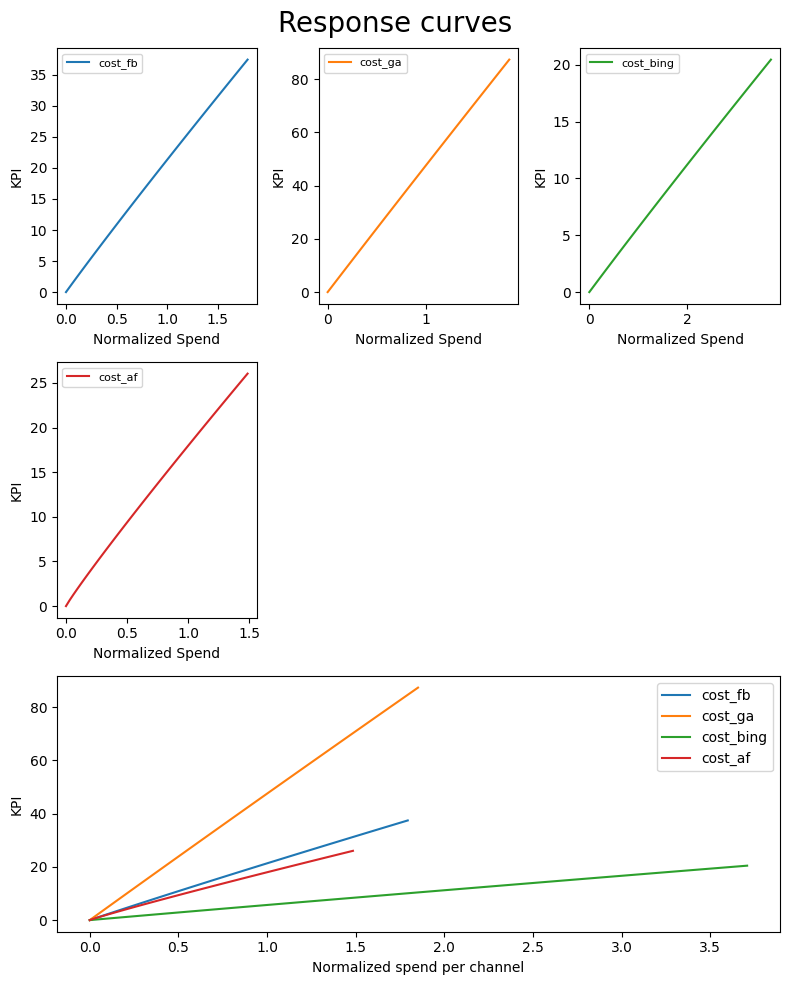

In [ ]:
plot.plot_response_curves(target_scaler=target_scaler, media_mix_model=mmm, seed=SEED)


In [ ]:
#print(media_contribution)

In [ ]:
#predicted_cost = mdsp_cols["cost_fb"].sum()
#print(predicted_cost)

In [ ]:
import pandas as pd
print(new_predictions)

In [ ]:
# Assuming media_contribution is an array or list with the media contribution for each channel
# and mdsp_cols is a list of channel names

# Specific channel you want to predict leads for
channel_name = 'cost_ga'

# Index of the channel in mdsp_cols
channel_index = mdsp_cols.index(channel_name)

# Media contribution for the specific channel
channel_contribution = media_contribution[channel_index]

# Spend or other input variable for the specific channel (you would replace this with the actual value)
channel_spend = 20000

# Calculate the predicted leads for the specific channel
predicted_leads = channel_contribution * channel_spend

print(f"Predicted leads for {channel_name}: {predicted_leads}")


Predicted leads for cost_ga: [ 9850.698  12525.008   1416.7294  6211.0166]


In [ ]:
# Daily channel spend for the cost_ga channel (replace with actual values)
daily_channel_spend = [2000, 3000]

# Predicted leads (from your previous output)
predicted_leads = [81.57488]

# Calculate daily CPL
daily_cpl = [spend / leads for spend, leads in zip(daily_channel_spend, predicted_leads)]

# Calculate average CPL
total_channel_spend = sum(daily_channel_spend)
total_predicted_leads = sum(predicted_leads)
average_cpl = total_channel_spend / total_predicted_leads

print(f"Daily CPL: {daily_cpl}")
print(f"Average CPL: {average_cpl}")


Daily CPL: [24.517351419946927]
Average CPL: 61.29337854986732


In [ ]:
prices = jnp.ones(mmm.n_media_channels)

In [ ]:
n_time_periods = 20
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods


In [ ]:
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -17296.629216121728
            Iterations: 36
            Function evaluations: 324
            Gradient evaluations: 36


In [ ]:
optimal_budget_allocation = prices * solution.x
optimal_budget_allocation

Array([427422.56 , 850770.25 ,  23265.602, 219339.84 ], dtype=float32)

In [ ]:
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([340568.72 , 986922.44 ,  18537.943, 174769.17 ], dtype=float32)

In [ ]:
budget, optimal_budget_allocation.sum()

(Array(1520798.2, dtype=float32), Array(1520798.2, dtype=float32))

In [ ]:
budget, jnp.sum(solution.x * prices)

(Array(1520798.2, dtype=float32), Array(1520798.2, dtype=float32))

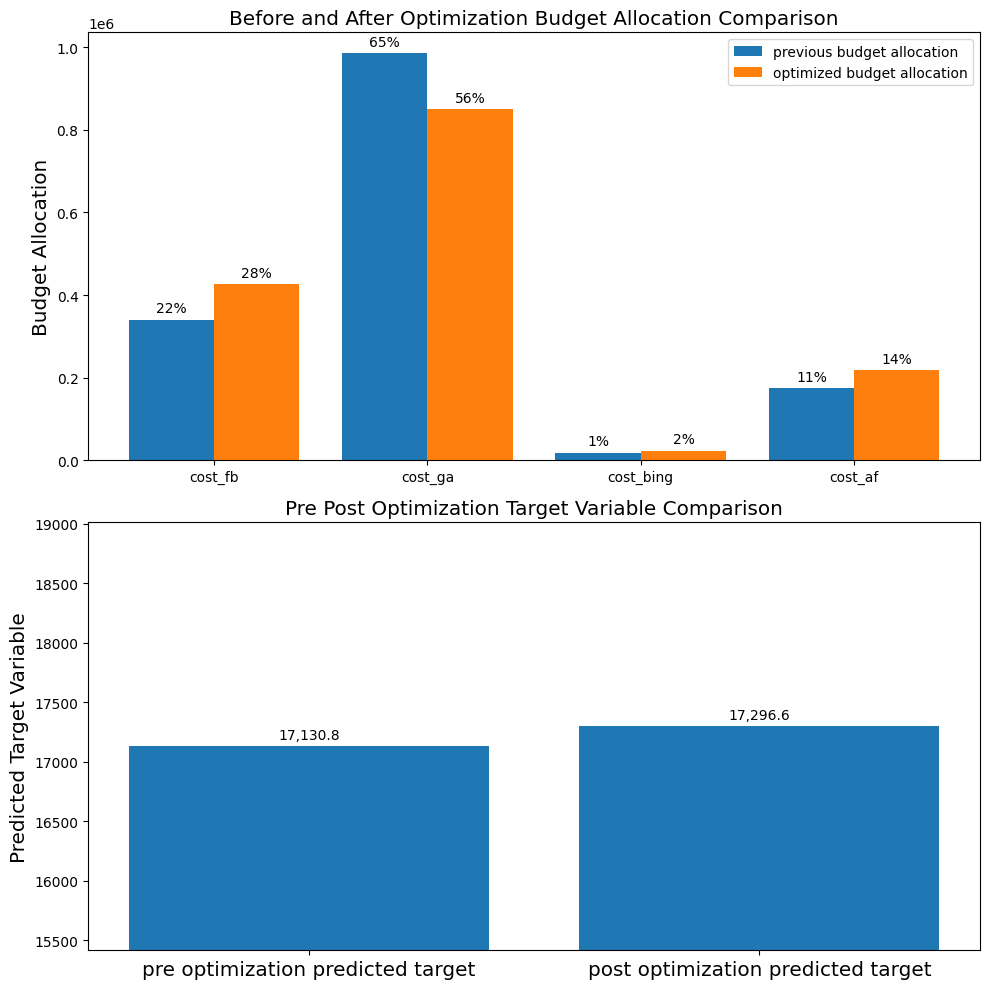

In [ ]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm,
                                                kpi_with_optim=solution['fun'],
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_budget_allocation,
                                                previous_budget_allocation=previous_budget_allocation,
                                                figure_size=(10,10),
                                                channel_names = mdsp_cols)